# Clustering and Dimensionality Reduction
In this notebook, we will explore **K-Means**, **DBSCAN**, and **PCA** using Python.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")


## Generate Sample Data

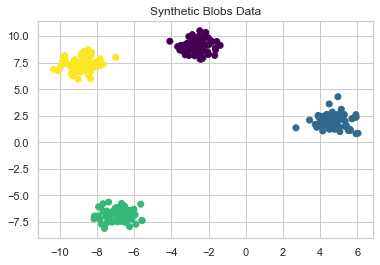

In [2]:

# Synthetic dataset for clustering
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs, cmap='viridis')
plt.title("Synthetic Blobs Data")
plt.show()


## K-Means Clustering

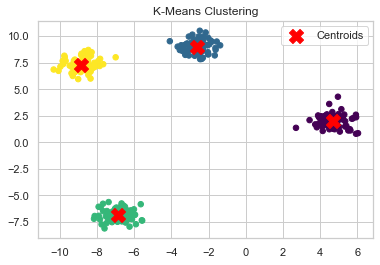

In [3]:

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_blobs)

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_kmeans, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()


This does two things together:(y_kmeans = kmeans.fit_predict(X_blobs))

fit → The model learns from the data X_blobs and finds the best 4 cluster centers.
👉 "Where should the 4 groups be placed?"

predict → After learning, it assigns each data point in X_blobs to one of the 4 groups (clusters).
👉 "Which point belongs to which group?"

Output (y_kmeans) →

It’s just a list/array of labels like [0, 1, 2, 3, 0, 2, ...].

Each number shows the cluster ID of that point.

Example: If the first value is 2, it means the first point belongs to Cluster 2.

- This line makes the computer find the groups in your data and give each point a group number.

## DBSCAN Clustering

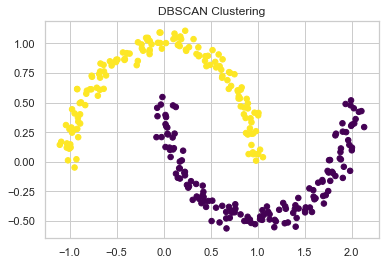

In [4]:

X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_dbscan, cmap='viridis', s=30)
plt.title("DBSCAN Clustering")
plt.show()


- n_samples=300 → Make 300 data points.

- noise=0.05 → Add a little bit of random messiness so the moons don’t look perfect.

- random_state=42 → Fix the randomness, so every time you run it, you get the same moons.

- eps=0.2 → The distance to look around each point. (Like a small circle radius 🔵 around a point. If other points fall inside, they’re neighbors).

- min_samples=5 → To make a cluster, you need at least 5 nearby points in that circle. If fewer than 5, it’s not a cluster.

✅ In very simple words:
This says:
👉 "Look around each point in a circle of radius 0.2.
👉 If at least 5 points are inside, call it a cluster.
👉 If not, call it noise."

## PCA (Principal Component Analysis)

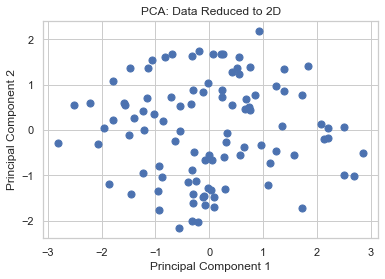

Explained Variance Ratio: [0.29005782 0.23214006]


In [5]:

# Create high-dimensional dataset
np.random.seed(42)
data = np.random.rand(100, 5) * 10  # 100 samples, 5 features

# Standardize before PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA (reduce to 2D)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='viridis', s=50)
plt.title("PCA: Data Reduced to 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
